In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv')

# 1. 데이터 확인

In [10]:
train.head()

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,...,5,5,3,5,3,5,3,47,22.0,NaN
1,2,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,...,4,3,3,4,4,4,4,5,2.0,NaN
2,3,Male,Loyal Customer,59,Business travel,Business,2962,0,4,0,...,1,1,1,1,5,1,4,54,46.0,NaN
3,4,Male,Loyal Customer,35,Business travel,Eco Plus,106,5,4,4,...,5,2,1,5,4,4,5,130,121.0,NaN
4,5,Female,Loyal Customer,9,Business travel,Business,2917,3,3,3,...,4,4,4,5,4,3,4,0,0.0,NaN


In [11]:
test.head(2)

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,1,Male,Loyal Customer,28,Business travel,Business,3414,2,2,2,...,2,4,5,4,4,4,2,0,0.0,40819.0
1,16,Female,disloyal Customer,34,Business travel,Eco,2556,1,1,1,...,2,5,1,5,1,3,2,15,0.0,33335.0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

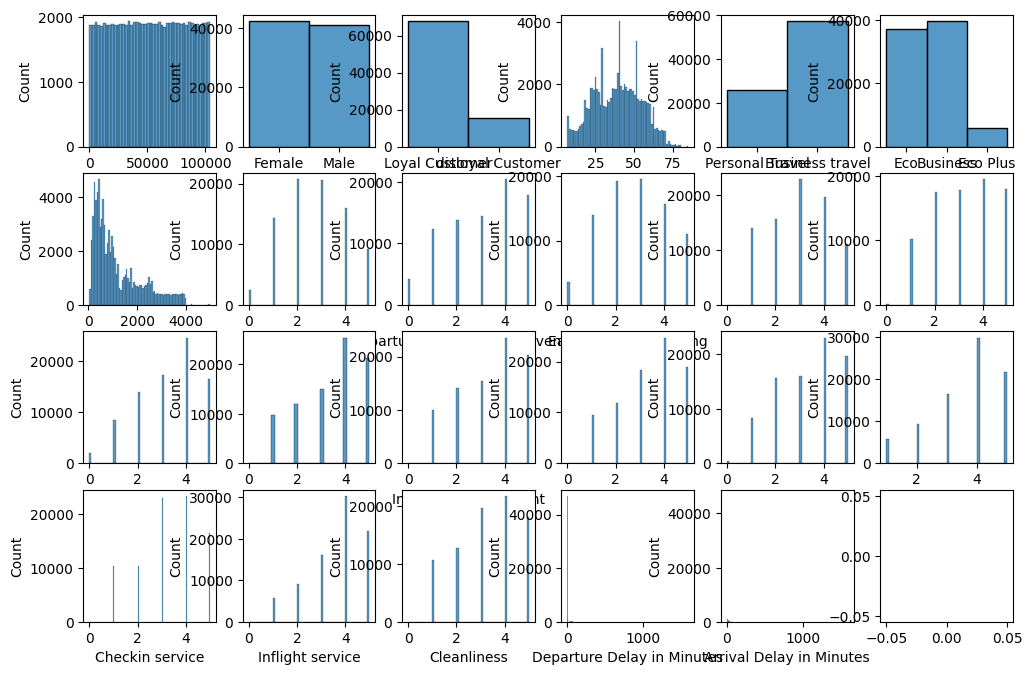

In [23]:
plt.figure(figsize = (12,12))

for i, col in enumerate(train.columns):
    ax = plt.subplot(6, 6, i+1)
    sns.histplot(x = str(col), data = train)
plt.show()

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

- **비행 탑승 만족도에 대한 데이터: 숫자형 변수로 표현되고 있지만 범주형 변수이므로 나눠서 취급하기**

In [24]:
obIdx = train.columns[[0, 1,2,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
numIdx = train.columns.difference(obIdx)

## 범주형 변수 확인

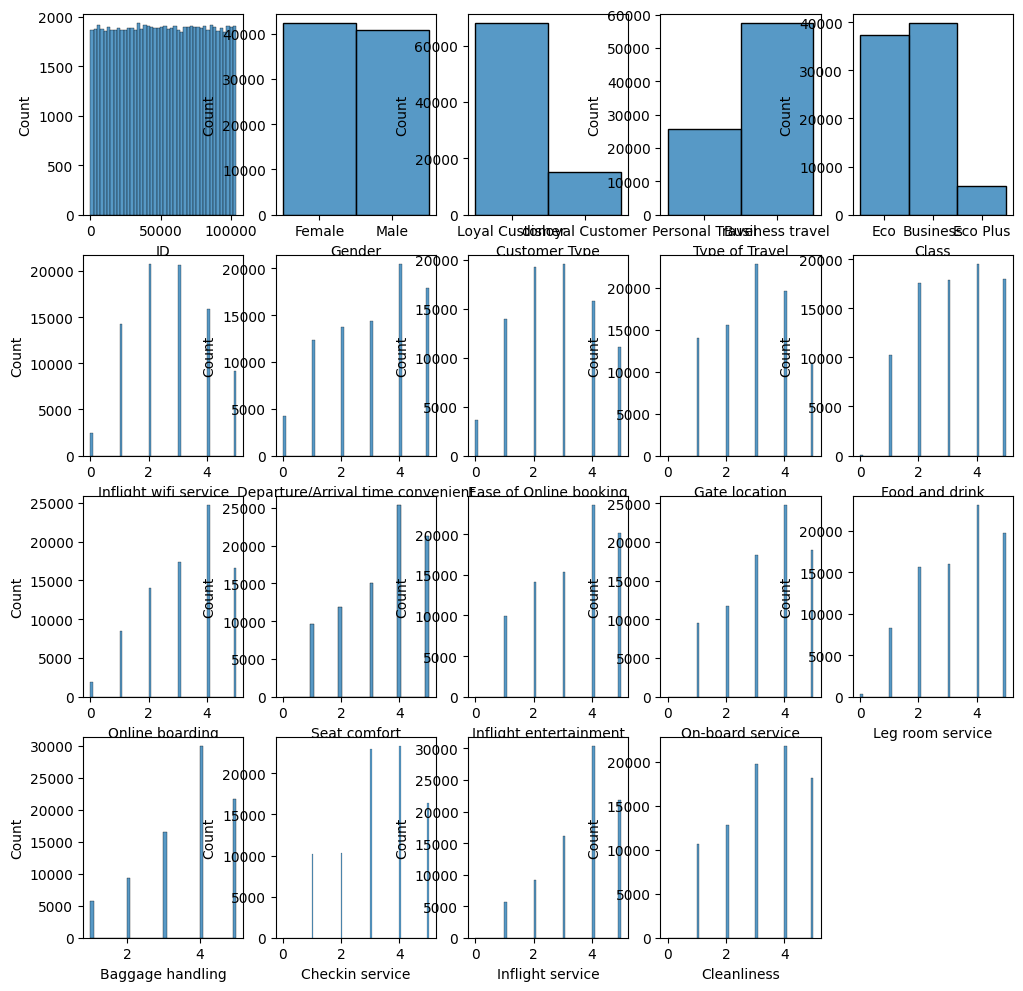

In [24]:
plt.figure(figsize = (12,12))

for i, col in enumerate(obIdx):
    ax = plt.subplot(4, 5, i+1)
    sns.histplot(x = str(col), data = train)
plt.show()

## 수치형 변수 확인

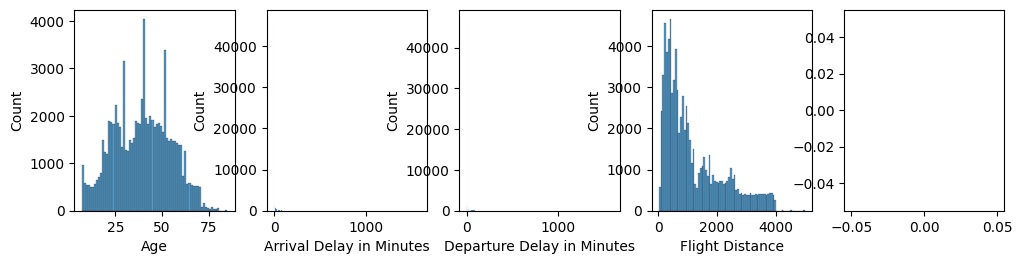

In [25]:
plt.figure(figsize = (12,12))

for i, col in enumerate(numIdx):
    ax = plt.subplot(4, 5, i+1)
    sns.histplot(x = str(col), data = train)
plt.show()

- **스케일링 필요**

# 2. EDA 및 전처리

### 데이터 전처리 연습 (MinMaxScaler, StandardScaler)

#### Q1. train 데이터의 Flight Distance 컬럼을 사이킷런 모듈을 이용하여 최솟값을 0 최댓값을 1값로 하는 데이터로 변환하고 scaling을 이름으로 하는 컬럼으로 데이터프레임에 추가하라

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# tr = [('ob', OneHotEncoder(handle_unknown = 'ignore'), ob_index),('num', StandardScaler(), num_index)]
# col_transformer = ColumnTransformer(transformers = tr)
# X_std = col_transformer.fit_transform(X)

In [27]:
mm = MinMaxScaler()
mm.fit(train['Flight Distance'].values.reshape(-1,1))
scalingFD = mm.transform(train['Flight Distance'].values.reshape(-1,1))
train['scailing'] = scalingFD

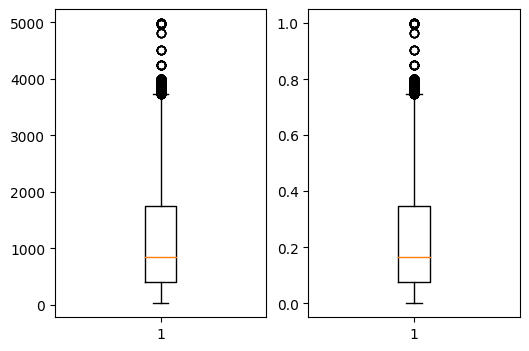

In [30]:
fd = ['Flight Distance', 'scailing']
plt.figure(figsize = (6,4))
for i, col in enumerate(fd):
    ax = plt.subplot(1, 2, i+1)
    plt.boxplot(x = str(col), data = train)
plt.show()

#### Q2. train 데이터의 Flight Distance 컬럼을 pandas의 내장함수만을 이용하여 최솟값을 0 최댓값을 1값로 하는 데이터로 변환하고 scaling을 이름으로 하는 컬럼으로 데이터프레임에 추가하라

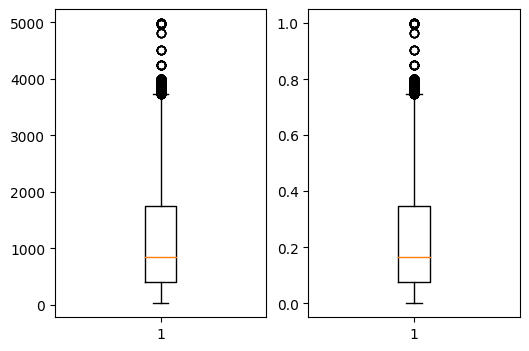

In [31]:
scailing = (train['Flight Distance'] - train['Flight Distance'].min()) / (train['Flight Distance'].max() - train['Flight Distance'].min())
train['scailing'] = scailing

fd = ['Flight Distance', 'scailing']
plt.figure(figsize = (6,4))
for i, col in enumerate(fd):
    ax = plt.subplot(1, 2, i+1)
    plt.boxplot(x = str(col), data = train)
plt.show()

#### Q3. train 데이터의 Age컬럼을 MinMax 스케일링 진행 하고 age_scaling컬럼에 추가하고 train셋과 같은 기준으로 test데이터의 Age를 스케일링하여 age_scaling에 추가하라

In [35]:
mm = MinMaxScaler()
mm.fit(train['Age'].values.reshape(-1,1))
train['age_scailing'] = mm.transform(train['Age'].values.reshape(-1,1))
test['age_scailing'] = mm.transform(test['Age'].values.reshape(-1,1))

In [39]:
train[['ID','age_scailing']].head(3)

,ID,age_scailing
0,0,0.602564
1,2,0.166667
2,3,0.666667


In [38]:
test[['ID','age_scailing']].head(3)

,ID,age_scailing
0,1,0.269231
1,16,0.346154
2,17,0.205128


#### Q4. train 데이터의 Age컬럼을 pandas 기본 내장 모듈을 이용하여 정규화 스케일링을 진행 하고 age_scaling컬럼에 추가하라

In [47]:
train['age_scailing'] = (train['Age'] - train['Age'].mean()) / (train['Age'].std())

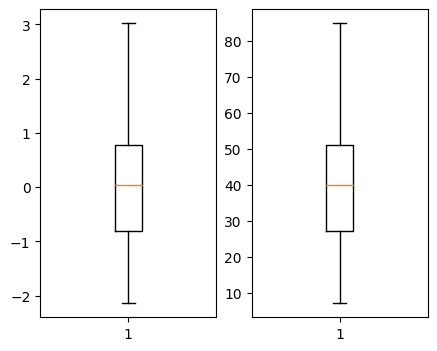

In [48]:
ages = ['age_scailing', 'Age']

plt.figure(figsize = (5,4))
for i, col in enumerate(ages):
    ax = plt.subplot(1, 2, i+1)
    plt.boxplot(x = str(col), data = train)
plt.show()

In [49]:
train[['ID', 'age_scailing']].head(3)

,ID,age_scailing
0,0,0.969360
1,2,-1.281924
2,3,1.300431


In [50]:
train['age_scailing'].describe()

count    8.312300e+04
mean     1.311490e-16
std      1.000000e+00
min     -2.142709e+00
25%     -8.184245e-01
50%      4.236061e-02
75%      7.707172e-01
max      3.022001e+00
Name: age_scailing, dtype: float64

#### Q5. train 데이터의 Age컬럼을 sklearn 모듈을 이용하여 정규화 스케일링을 진행 하고 age_scaling컬럼에 추가하고 train셋과 같은 기준으로 test데이터의 Age를 스케일링하여 age_scaling에 추가하라

In [51]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train['Age'].values.reshape(-1,1))
train['age_scailing'] = ss.transform(train['Age'].values.reshape(-1,1))

In [52]:
train[['ID', 'age_scailing']].head(3)

,ID,age_scailing
0,0,0.969366
1,2,-1.281932
2,3,1.300439


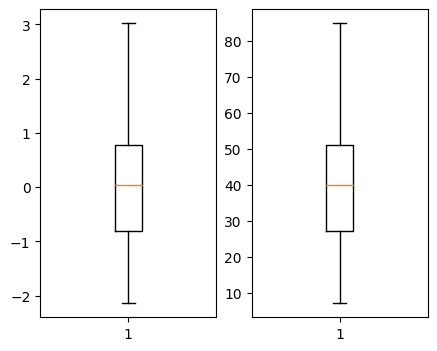

In [53]:
plt.figure(figsize=(5,4))
for i, col in enumerate(ages):
    ax = plt.subplot(1,2,i+1)
    plt.boxplot(x=str(col), data = train)
plt.show()

## 2-1. EDA

In [57]:
train['total_delay'] = train['Departure Delay in Minutes'] + train['Arrival Delay in Minutes']
train[['total_delay', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].head(3)

,total_delay,Departure Delay in Minutes,Arrival Delay in Minutes
0,69.0,47,22.0
1,7.0,5,2.0
2,100.0,54,46.0


In [59]:
train = train.drop(['scailing', 'age_scailing'], axis = 1)
train.columns

Index(['ID', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'id', 'total_delay'],
      dtype='object')

In [61]:
train.rename(lambda x: x.lower().strip().replace(' ', '_'), axis = 'columns', inplace = True)
train.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'id', 'total_delay'],
      dtype='object')

In [62]:
# test 프레임에도 똑같이 적용
test['total_delay'] = test['Departure Delay in Minutes'] + test['Arrival Delay in Minutes']
test.rename(lambda x: x.lower().strip().replace(' ', '_'), axis = 'columns', inplace = True)
test = test.drop(['age_scailing'], axis = 1)
test.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'id', 'total_delay'],
      dtype='object')

In [69]:
# 컬럼 이름에 중복이 있다. 그 중 하나의 이름 변경
colNames = train.columns.tolist()

for i in range(len(colNames)):
    if colNames[i] == 'id':
        colNames[i] = 'customer_id' 
        break

train.columns = colNames

In [69]:
# test 프레임에도 적용

colNames = test.columns.tolist()

for i in range(len(colNames)):
    if colNames[i] == 'id':
        colNames[i] = 'customer_id' 
        break

test.columns = colNames

In [71]:
train.head(2)

,customer_id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,id,total_delay
0,0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,...,5,3,5,3,5,3,47,22.0,NaN,69.0
1,2,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,...,3,3,4,4,4,4,5,2.0,NaN,7.0


In [75]:
numIdx = list(numIdx)
numIdx.remove('id')
numIdx

['Age',
 'Arrival Delay in Minutes',
 'Departure Delay in Minutes',
 'Flight Distance']

In [81]:
numIndex = []
for i in numIdx:
    i = i.lower().strip().replace(' ','_')
    numIndex.append(i)
print(numIndex)

['age', 'arrival_delay_in_minutes', 'departure_delay_in_minutes', 'flight_distance']


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ss = [('num', StandardScaler(), numIndex)]
col_transformer = ColumnTransformer(transformers = ss)
train_std = col_transformer.fit_transform(train)
test_std = col_transformer.fit_transform(test)